## This code will calculate IMERG seasonal precipitation varaince and plot them 

Author: Fouzia Fahrin (ffahrin@iastate.edu)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker


from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from datetime import datetime

ERROR 1: PROJ: proj_create_from_database: Open of /opt/miniconda3/envs/prod/share/proj failed


In [2]:
figfolder = './'
dataset = 'IMERG'

In [5]:
dri = '/lss/research/agon-lab/IMERG-daily/NASA_interpolated/'
fn = 'IMERG_20000601-20210930_anom_final.nc'

data_pr = xr.open_dataset(dri+fn)

In [6]:
lats_eq = -20
latn_eq = 20.
lonw_eq = 225
lone_eq = 285
mn0 = 2
mnf = 4
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [7]:
time_all = data_pr['time']
time_all

<xarray.DataArray 'time' (time: 7792)>
array(['2000-06-01T00:00:00.000000000', '2000-06-02T00:00:00.000000000',
       '2000-06-03T00:00:00.000000000', ..., '2021-09-28T00:00:00.000000000',
       '2021-09-29T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
Attributes:
    standard_name:  time
    axis:           T

In [8]:
# set up conditional statements 
cond1_fma = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_fma = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_fma = time_all.where((cond1_fma)& (cond2_fma), drop=True) 

In [9]:
time_fma

<xarray.DataArray 'time' (time: 1785)>
array(['2001-02-01T00:00:00.000000000', '2001-02-02T00:00:00.000000000',
       '2001-02-03T00:00:00.000000000', ...,
       '2020-04-28T00:00:00.000000000', '2020-04-29T00:00:00.000000000',
       '2020-04-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-02-01 2001-02-02 ... 2020-04-30
Attributes:
    standard_name:  time
    axis:           T

In [11]:
mn0 = 5
mnf = 7
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [12]:
cond1_MJJ = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_MJJ = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_MJJ = time_all.where((cond1_MJJ)& (cond2_MJJ), drop=True) 

In [13]:
time_MJJ

<xarray.DataArray 'time' (time: 1840)>
array(['2001-05-01T00:00:00.000000000', '2001-05-02T00:00:00.000000000',
       '2001-05-03T00:00:00.000000000', ...,
       '2020-07-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-05-01 2001-05-02 ... 2020-07-31
Attributes:
    standard_name:  time
    axis:           T

In [14]:
mn0 = 8
mnf = 10
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [15]:
cond1_ASO = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_ASO = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_ASO = time_all.where((cond1_ASO)& (cond2_ASO), drop=True) 

In [16]:
yr0 = 2001
yrf = 2020
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

mn0 = 11
mnf = 4

In [17]:
# set up conditional statements 

if mn0 > mnf:
    cond1 = (time_all['time.month'] >= mn0) & (time_all['time.year'] <= yrf-1) # season of interest
    cond2 = (time_all['time.month'] <= mnf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) | (cond2), drop=True) 
elif mn0 < mnf:
    cond1 = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
    cond2 = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) & (cond2), drop=True) 
else:
    cond1 = (time_all['time.month'] == mn0) # season of interest
    cond2 = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
    time_NDJ = time_all.where((cond1) & (cond2), drop=True) 

time_NDJ

<xarray.DataArray 'time' (time: 3745)>
array(['2000-11-01T00:00:00.000000000', '2000-11-02T00:00:00.000000000',
       '2000-11-03T00:00:00.000000000', ...,
       '2021-04-28T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-11-01 2000-11-02 ... 2021-04-30
Attributes:
    standard_name:  time
    axis:           T

In [22]:
anomalies_fma = data_pr['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq),time=time_fma).var(dim=('time'))#,'lat','lon'))#.transpose()
anomalies_MJJ = data_pr['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq),time=time_MJJ).var(dim=('time'))#,'lat','lon'))
anomalies_ASO = data_pr['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq),time=time_ASO).var(dim=('time'))#,'lat','lon'))
anomalies_NDJ = data_pr['precipitationCal'].sel(lat=slice(lats_eq,latn_eq),lon=slice(lonw_eq,lone_eq),time=time_NDJ).var(dim=('time'))#,'lat','lon'))

In [24]:
lev_pr2 = np.arange(1, 700, 49.)
ls=30

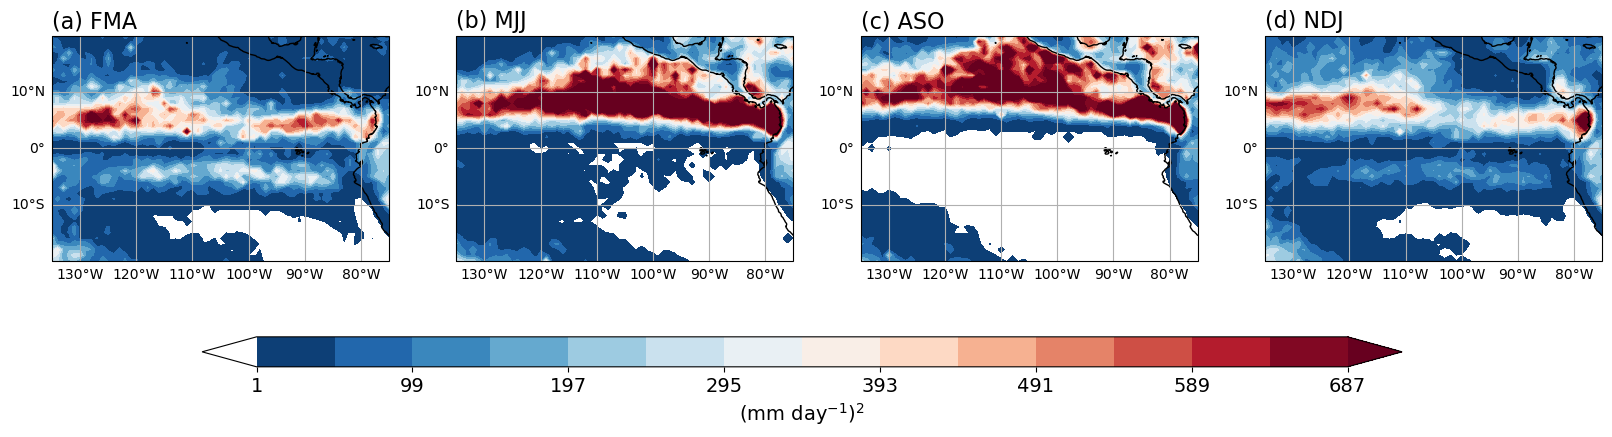

In [27]:
cmap = plt.matplotlib.colormaps.get_cmap("RdBu").reversed().copy()
#color_map_b = plt.cm.get_cmap('Blues')
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(20, 12))#, tight_layout=True)
#fig.suptitle(dataset+' daily precipitation rate (mm/day)', fontsize=18) #, y=0.98
for j in range(0,npan,1):
    ax1 = fig.add_subplot(2,npan,j+1,projection=ccrs.PlateCarree(central_longitude=180.))
    #plt.title('MJO phase = '+str(j+1),  loc='left')
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80])
    gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
    if j == 0:
        plt.title('(a) FMA', loc='left',fontsize=16)
        cf = plt.contourf(anomalies_fma['lon'], anomalies_fma['lat'], anomalies_fma, cmap=cmap, transform=ccrs.PlateCarree(),levels=lev_pr2,
                     extend ='both',vmin=5)
        cmap = cf.get_cmap()
        cmap.set_under('w')
        cf.set_cmap(cmap)
    
    if j == 1:
        plt.title('(b) MJJ', loc='left',fontsize=16)
        cf = plt.contourf(anomalies_MJJ['lon'], anomalies_MJJ['lat'], anomalies_MJJ, cmap=cmap, transform=ccrs.PlateCarree(),levels=lev_pr2,
                       extend ='both',vmin=5)
        cf.cmap.set_under("white")

    if j == 2:
        plt.title('(c) ASO', loc='left',fontsize=16)
        cf = plt.contourf(anomalies_ASO['lon'], anomalies_ASO['lat'], anomalies_ASO, cmap=cmap, transform=ccrs.PlateCarree(),levels=lev_pr2,
                       extend ='both',vmin=5) 
        cf.cmap.set_under("white")

    if j == 3:
        plt.title('(d) NDJ', loc='left',fontsize=16)
        cf = plt.contourf(anomalies_NDJ['lon'], anomalies_NDJ['lat'], anomalies_NDJ, cmap=cmap, transform=ccrs.PlateCarree(),levels=lev_pr2,
                       extend ='both',vmin=5)   
        cf.cmap.set_under("white")
    
fig.subplots_adjust(bottom=0.009)
cbar_ax = fig.add_axes([0.2, 0.5, 0.6, 0.025])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation="horizontal")
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'(mm$~$day$^{-1}$)$^{2}$', fontsize=14)

#plt.savefig(figfolder+'IMERG_NASAint_pr_var_20n-20s.pdf', bbox_inches="tight",transparent=False)          